# Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.stats import zscore
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

a)	Refer to this link, https://archive.ics.uci.edu/ml/datasets/wine and read the description of the dataset and attach suitable headers.

In [2]:
#reading data
wine_df = pd.read_csv('D:\\Downloads\\wine-1.xls',names = ["Cultivator", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280_diluted_wines", "Proline"])

In [3]:
wine_df.head()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_df.shape

(178, 14)

In [5]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [6]:
wine_df['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

b)	Remove the first column (cultivator) and perform KMeans with (K=3) and show the 3D cluster plot with the most appropriate attributes in X,Y and Z –axis. 

In [7]:
#assuming the data doesnt have cultivator and then learning the data
df2 = wine_df.loc[:, 'Alcohol':'Proline'] 

In [8]:
df2.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


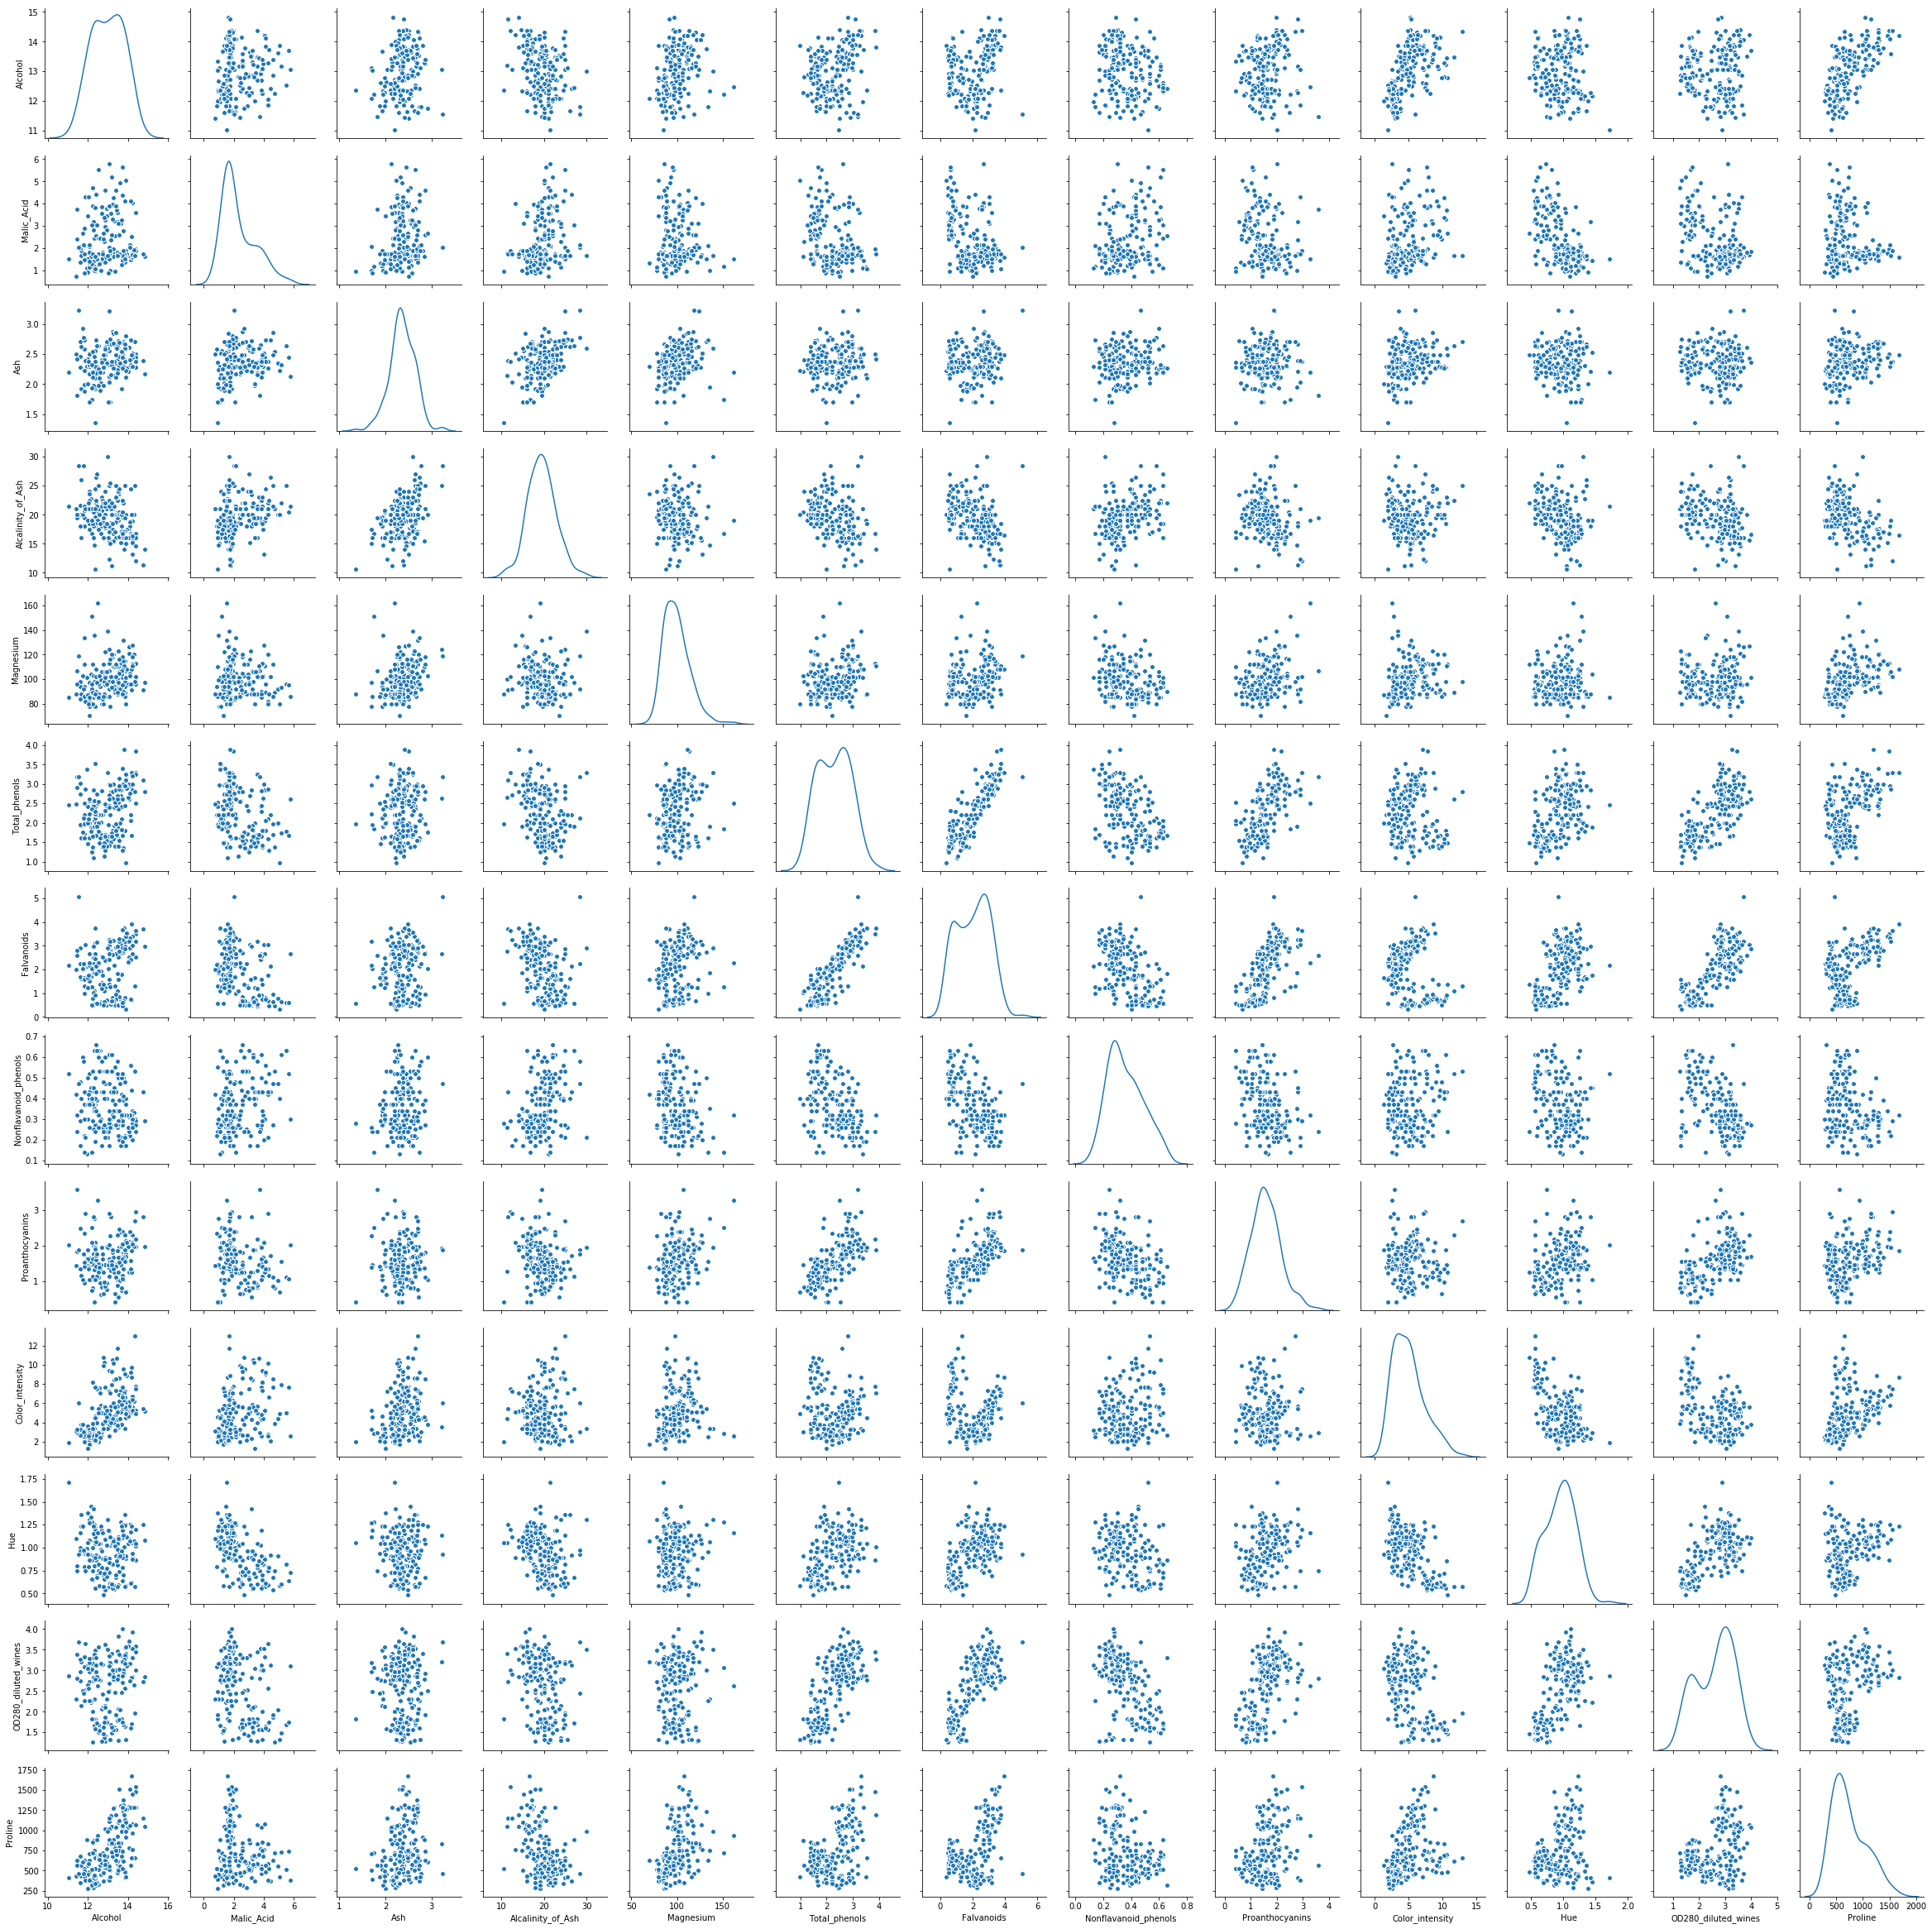

In [15]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

In [ ]:
#From the above pairplot it is observed that the wine data has a mix of gaussians

In [9]:
wine_df.corr()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_diluted_wines,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [10]:
df2.corr()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_diluted_wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [11]:
#scalling
df_scaled = df2.apply(zscore)

In [12]:
df_scaled.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [13]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled) 
  labels = clusters.labels_ 
  centroids = clusters.cluster_centers_ 
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2314.000000
1,2,1658.758852
2,3,1277.928489
3,4,1184.750355
4,5,1104.546170
5,6,1042.477028
6,7,998.705448
7,8,935.982772
8,9,894.543214
9,10,865.856817


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

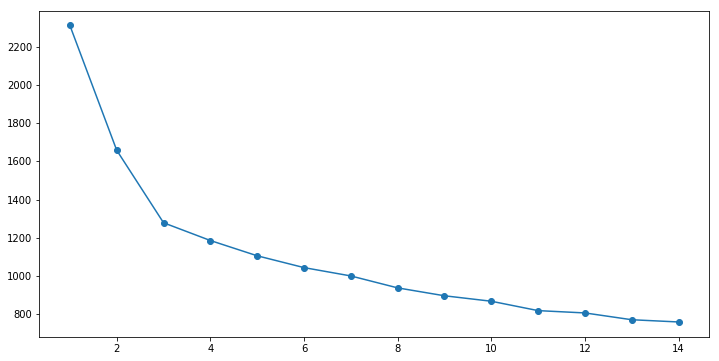

In [14]:
# Elbow plot 

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [15]:
#from the elbow plot, it is inferred that K=3, Hence modeling kmeans with k=3

# K Means Modeling

In [16]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [17]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [18]:
centroids = kmeans.cluster_centers_

In [19]:
centroids

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [20]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [21]:
centroid_df

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_diluted_wines,Proline
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
2,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088


In [22]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels.head()

,labels
0,0
1,0
2,0
3,0
4,0


In [23]:
df_labels['labels'] = df_labels['labels'].astype('category')

In [24]:
type(df_labels)

pandas.core.frame.DataFrame

In [25]:
wine_df_labeled = df2.join(df_labels)

In [26]:
df_analysis = (wine_df_labeled.groupby(['labels'] , axis=0)).head()  
df_analysis

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_diluted_wines,Proline,labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,1
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,1
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,1
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,1


In [27]:
wine_df_labeled['labels'].value_counts()

1    65
0    62
2    51
Name: labels, dtype: int64

D:\New folder (3)\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\New folder (3)\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


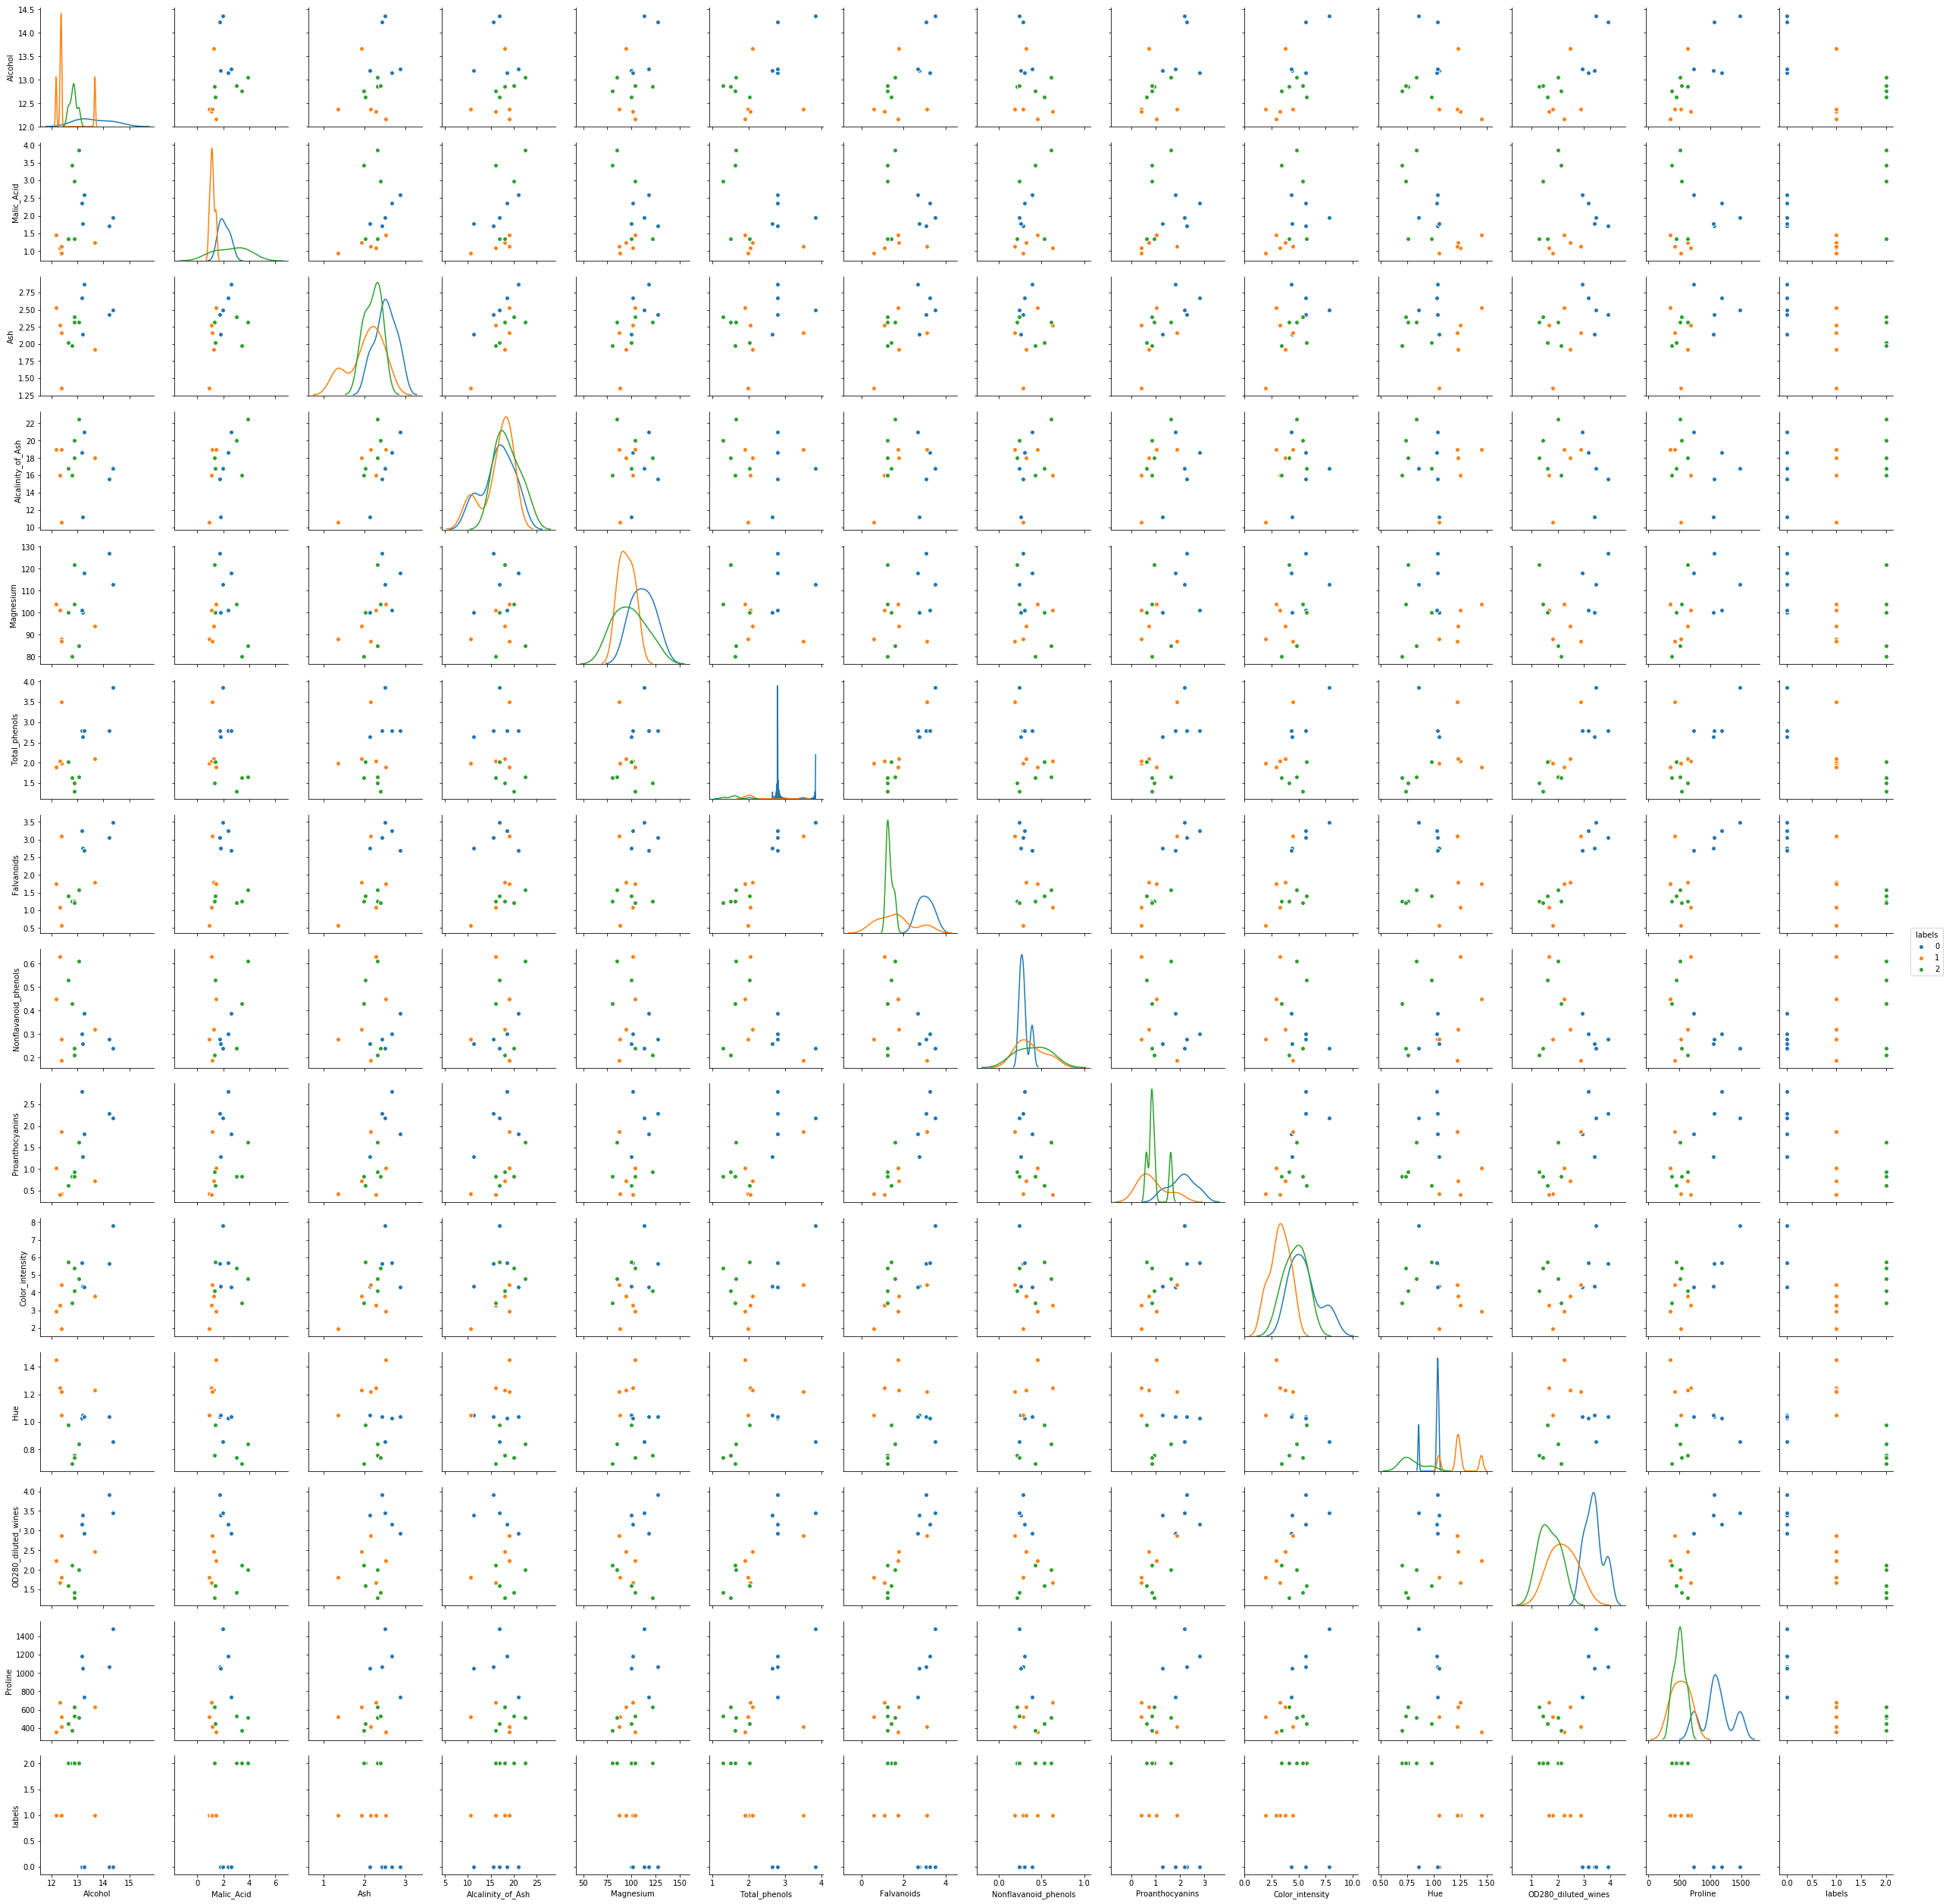

In [29]:
import seaborn as sns
sns.pairplot(df_analysis,hue='labels',diag_kind='kde')

Text(0.5,0.92,'3D plot of KMeans Clustering')

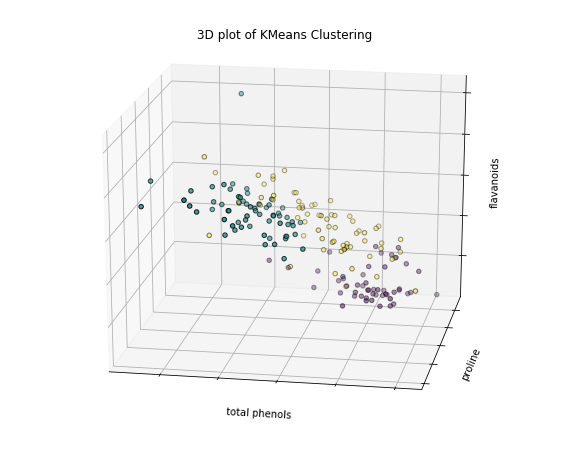

In [206]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 5], df_scaled.iloc[:, 12], df_scaled.iloc[:, 6],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('total phenols')
ax.set_ylabel('proline')
ax.set_zlabel('flavanoids')
ax.set_title('3D plot of KMeans Clustering')

c)	Remove the first column (cultivator) and perform  Hierarchical Clustering (K=3) with the best linkage method and show the 3D cluster plot with the most appropriate attributes in X,Y and Z –axis. 

# AgglomerativeClustering 

In [30]:

# closer it is to 1, the better is the clustering

Z_w = linkage(df_scaled, 'ward')
c, coph_dists = cophenet(Z_w , pdist(df_scaled))

c

0.6623487206613261

In [31]:

Z_co = linkage(df_scaled, 'complete')
c, coph_dists = cophenet(Z_co , pdist(df_scaled))

c

0.5916829459078577

In [32]:
Z_s = linkage(df_scaled, 'single')
c, coph_dists = cophenet(Z_s , pdist(df_scaled))

c

0.5436231199247621

In [33]:
Z_c = linkage(df_scaled, 'centroid')
c, coph_dists = cophenet(Z_c , pdist(df_scaled))

c

0.7565245602161739

In [34]:
Z_a = linkage(df_scaled, 'average')
c, coph_dists = cophenet(Z_a , pdist(df_scaled))

c

0.7590840545998375

In [35]:
#average is close to 1 hence it is used as the linkage method

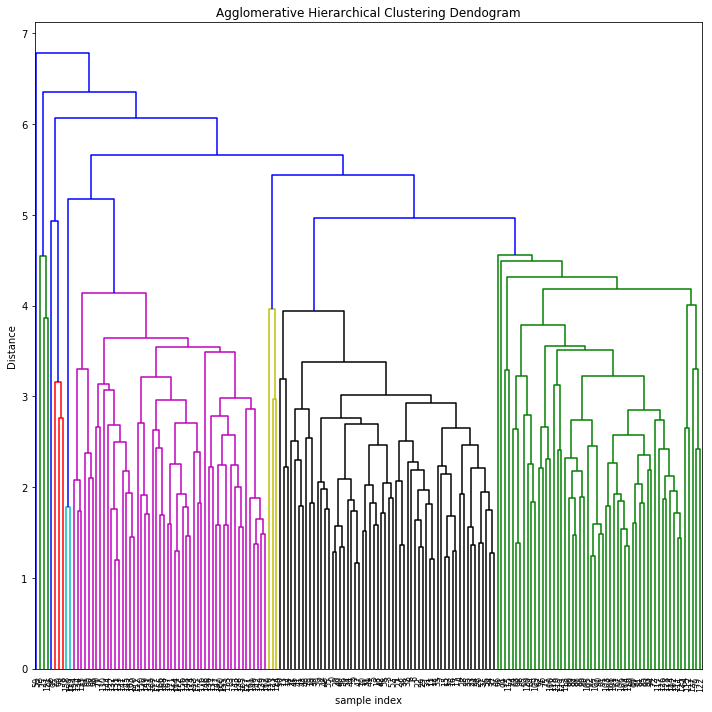

In [37]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_a, leaf_rotation=90., leaf_font_size=8. )
plt.tight_layout()

In [156]:
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [157]:
agg_clustering.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x00000034F8EA00D0>)

In [158]:
df_scaled['labels_agg'] = agg_clustering .labels_
type(df_scaled)

pandas.core.frame.DataFrame

In [161]:
wine_clusters = df_scaled.groupby(['labels_agg'])

In [162]:
print(wine_clusters)

In [163]:
wine_groups=wine_clusters

In [164]:
wine_groups.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_diluted_wines,Proline,labels_agg
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
25,0.061000,-0.257044,3.119772,1.653086,1.703265,0.536601,0.653312,0.871420,0.576613,-0.639377,0.757038,0.830961,0.264653,2
59,-0.778980,-1.253450,-3.679162,-2.671018,-0.824415,-0.504914,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540,1
73,-0.013116,-0.598156,0.853460,3.154511,2.756465,1.610163,0.864145,-1.223610,0.646696,-0.738868,1.546759,1.254694,0.758249,2
121,-1.779545,-0.257044,3.156325,2.704083,1.352198,1.417883,3.062832,0.871420,0.489009,0.407442,-0.120430,1.523058,-0.897687,2


Text(0.5,0.92,'3D plot of agglomerative Clustering')

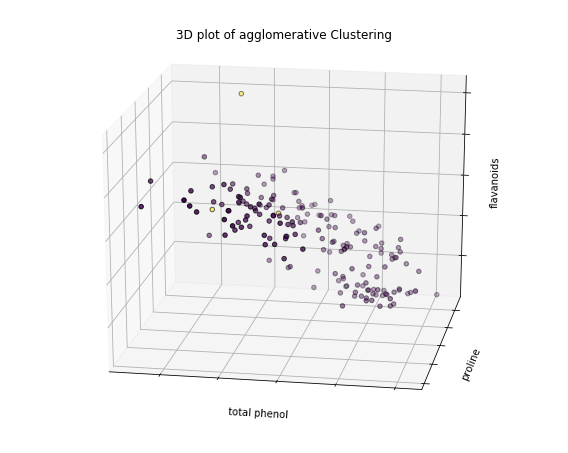

In [199]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
agg_clustering.fit(df_scaled)
labels = agg_clustering.labels_
ax.scatter(df_scaled.iloc[:, 5], df_scaled.iloc[:, 12], df_scaled.iloc[:, 6],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('total phenol')
ax.set_ylabel('proline')
ax.set_zlabel('flavanoids')
ax.set_title('3D plot of agglomerative Clustering')

d)	Comment on the results obtained using KMeans and  Hierarchical Clustering, which clustering method best suited for this dataset.

In [ ]:
clusters after kmeans
1    65
0    62
2    51
the clusters are almost equal in number

clusters after agglomerativeclustering
0    174
2      3
1      1
the cluster 0 has more count than 1 and 2

cultivator count before clustering
2    71
1    59
3    48

#from the above values kmeans clustering is closer to the original cultivator count than agglomerative clustering
#also, from the graph in kmeans there is no much overlap in clustering than agglomerative
#hence K means clustering is best suited for this dataset

e)	Apply PCA technique on the 13 independent variables and reduce the dimensions to (top-7) PC dimensions based on Eigen Values and reduce the original dataset to 178 x 7 dimension and fit a Logistic Regression model for (70%) of records and validate on (30%) of the records with precision and recall values.

In [84]:
# Define features
X = wine_df.loc[:, 'Alcohol':'Proline']

# Define categorical outcome 
y = wine_df.iloc[:,0]

In [86]:
X.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [85]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Cultivator, dtype: int64

In [90]:
# Standardize feature space to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0) #built in fn can also be used

X_std.shape


(178, 13)

In [89]:
X_std.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [88]:
# Step 1: Find covariance matrix of X

# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False) 
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909

In [91]:
# Step 2: Obtain eigenvectors and eigenvalues
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)


print('Eigenvectors of Cov(X): \n%s' %eigenvectors) 

print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)


Eigenvectors of Cov(X): 
[[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951 -0.14617896  0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135

In [92]:
# Step 3 (continued): Sort eigenvalues in descending order

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs

[(4.732436977583594,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.511080929645123,
  array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
          0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
         -0.27923515, -0.16449619,  0.36490283])),
 (1.4542418678464695,
  array([ 0.20738262, -0.08901289, -0.6262239 , -0.61208035, -0.13075693,
         -0.14617896, -0.1506819 , -0.17036816, -0.14945431,  0.13730621,
         -0.08522192, -0.16600459,  0.12674592])),
 (0.924165866824875,
  array([-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
          0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
         -0.42777141,  0.18412074, -0.23207086])),
 (0.8580486765371109,
  array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
         -0.14931841, -

In [93]:
# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs

[(0.10396199182075326,
  array([-0.01496997, -0.02596375,  0.14121803, -0.09168285, -0.05677422,
          0.46390791, -0.83225706, -0.11403985,  0.11691707,  0.0119928 ,
          0.08988884,  0.15671813, -0.01444734])),
 (0.1697237389801216,
  array([-0.26628645,  0.12169604, -0.04962237, -0.05574287,  0.06222011,
         -0.30388245, -0.04289883,  0.04235219, -0.09555303,  0.60422163,
          0.259214  ,  0.60095872, -0.07940162])),
 (0.2270642817308856,
  array([-0.22591696,  0.07648554, -0.49869142,  0.47931378,  0.07128891,
          0.30434119, -0.02569409,  0.11689586, -0.23736257,  0.0318388 ,
         -0.04821201,  0.0464233 ,  0.53926983])),
 (0.25232001036082496,
  array([ 0.21160473, -0.30907994, -0.02712539,  0.05279942,  0.06787022,
         -0.32013135, -0.16315051,  0.21553507,  0.1341839 , -0.29077518,
         -0.52239889,  0.52370587,  0.162116  ])),
 (0.2905120326939777,
  array([-0.50861912,  0.07528304,  0.30769445, -0.20044931, -0.27140257,
         -0.286034

In [94]:
eig_pairs.reverse()
eig_pairs

[(4.732436977583594,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.511080929645123,
  array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
          0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
         -0.27923515, -0.16449619,  0.36490283])),
 (1.4542418678464695,
  array([ 0.20738262, -0.08901289, -0.6262239 , -0.61208035, -0.13075693,
         -0.14617896, -0.1506819 , -0.17036816, -0.14945431,  0.13730621,
         -0.08522192, -0.16600459,  0.12674592])),
 (0.924165866824875,
  array([-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
          0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
         -0.42777141,  0.18412074, -0.23207086])),
 (0.8580486765371109,
  array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
         -0.14931841, -

In [95]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[4.732436977583594, 2.511080929645123, 1.4542418678464695, 0.924165866824875, 0.8580486765371109, 0.645282212467855, 0.5541414662457842, 0.3504662749462544, 0.2905120326939777, 0.25232001036082496, 0.2270642817308856, 0.1697237389801216, 0.10396199182075326]


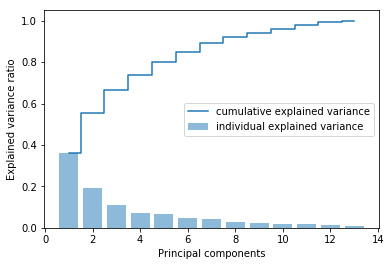

In [97]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


plt.bar(range(1,14), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


In [104]:
# Step 4: Project data onto 2d 

P_reduce = np.array(eigvectors_sort[0:13]).transpose() ributes

P_reduce

array([[-0.1443294 ,  0.48365155,  0.20738262, -0.0178563 , -0.26566365,
         0.21353865,  0.05639636,  0.39613926, -0.50861912,  0.21160473,
        -0.22591696, -0.26628645, -0.01496997],
       [ 0.24518758,  0.22493093, -0.08901289,  0.53689028,  0.03521363,
         0.53681385, -0.42052391,  0.06582674,  0.07528304, -0.30907994,
         0.07648554,  0.12169604, -0.02596375],
       [ 0.00205106,  0.31606881, -0.6262239 , -0.21417556, -0.14302547,
         0.15447466,  0.14917061, -0.17026002,  0.30769445, -0.02712539,
        -0.49869142, -0.04962237,  0.14121803],
       [ 0.23932041, -0.0105905 , -0.61208035,  0.06085941,  0.06610294,
        -0.10082451,  0.28696914,  0.42797018, -0.20044931,  0.05279942,
         0.47931378, -0.05574287, -0.09168285],
       [-0.14199204,  0.299634  , -0.13075693, -0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.15636143, -0.27140257,  0.06787022,
         0.07128891,  0.06222011, -0.05677422],
       [-0.39466085,  0.065039

In [105]:
# Let's project data onto 2D space
Proj_data_2D = np.dot(X_std,P_reduce) 
Proj_data_2D.shape

(178, 13)

In [106]:
Proj_data_2D[0,:] 

array([-3.31675081,  1.44346263,  0.16573904, -0.21563119,  0.69304284,
        0.22388013, -0.59642655, -0.06513909, -0.64144271,  1.02095585,
       -0.4515634 ,  0.54081041,  0.06623863])

In [108]:
X_std.shape, P_reduce.shape, Proj_data_2D.shape

((178, 13), (13, 13), (178, 13))

#reducing the dimensions to (top-7) PC dimensions 

In [109]:
#reducing the dimensions to (top-7) PC dimensions 
P_reduce_7 = np.array(eigvectors_sort[0:7]).transpose() 

P_reduce_7

array([[-0.1443294 ,  0.48365155,  0.20738262, -0.0178563 , -0.26566365,
         0.21353865,  0.05639636],
       [ 0.24518758,  0.22493093, -0.08901289,  0.53689028,  0.03521363,
         0.53681385, -0.42052391],
       [ 0.00205106,  0.31606881, -0.6262239 , -0.21417556, -0.14302547,
         0.15447466,  0.14917061],
       [ 0.23932041, -0.0105905 , -0.61208035,  0.06085941,  0.06610294,
        -0.10082451,  0.28696914],
       [-0.14199204,  0.299634  , -0.13075693, -0.35179658,  0.72704851,
         0.03814394, -0.3228833 ],
       [-0.39466085,  0.06503951, -0.14617896,  0.19806835, -0.14931841,
        -0.0841223 ,  0.02792498],
       [-0.4229343 , -0.00335981, -0.1506819 ,  0.15229479, -0.10902584,
        -0.01892002,  0.06068521],
       [ 0.2985331 ,  0.02877949, -0.17036816, -0.20330102, -0.50070298,
        -0.25859401, -0.59544729],
       [-0.31342949,  0.03930172, -0.14945431,  0.39905653,  0.13685982,
        -0.53379539, -0.37213935],
       [ 0.0886167 ,  0.5299

In [117]:
# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D_7 = np.dot(X_std,P_reduce_7) 
Proj_data_2D_7.shape

(178, 7)

In [205]:
Proj_data_2D_7[0,:7] 

array([-3.31675081,  1.44346263,  0.16573904, -0.21563119,  0.69304284,
        0.22388013, -0.59642655])

In [120]:
P_reduce_7.shape, Proj_data_2D_7.shape

((13, 7), (178, 7))

# Building LogisticRegression after PCA 

In [128]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_2D_7, y, test_size=test_size, random_state=seed)

In [129]:
from sklearn import metrics
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
acc=metrics.accuracy_score(y_test,y_predict)
print("accuracy",acc)

accuracy 0.9814814814814815


In [123]:
cm=metrics.confusion_matrix(y_test,y_predict)
print(cm)

[[13  0  0]
 [ 0 24  0]
 [ 0  1 16]]


In [125]:
cr=metrics.classification_report(y_test,y_predict)
print(cr)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        13
          2       0.96      1.00      0.98        24
          3       1.00      0.94      0.97        17

avg / total       0.98      0.98      0.98        54



f) Compare the above (e) results with fitting a Logistic Regression model for the original dataset (178 x 13) without applying PCA. [with 70% & 30% split]¶

# LogisticRegression without PCA

In [134]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [135]:
from sklearn import metrics
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
#result = model.score(X_test, y_test)
y_predict=model.predict(X_test)
acc=metrics.accuracy_score(y_test,y_predict)
print("accuracy",acc)

accuracy 0.9259259259259259


In [136]:
cm=metrics.confusion_matrix(y_test,y_predict)
print(cm)

[[12  1  0]
 [ 3 21  0]
 [ 0  0 17]]


In [137]:
cr=metrics.classification_report(y_test,y_predict)
print(cr)

             precision    recall  f1-score   support

          1       0.80      0.92      0.86        13
          2       0.95      0.88      0.91        24
          3       1.00      1.00      1.00        17

avg / total       0.93      0.93      0.93        54



The recall value after PCA(reducing to top 7 PC dimensions) is 0.98 
The recall value without PCA is 0.93
This implies that perfoming logistic regression after PCA has high recall rate 

g)	Comment on the effect of PCA with reference to Bias – Variance trade off, between the model (e) and (f)

When PCA is applied,
*it captures variance across all possible planes and PCA makes sure the model does not suffer with bias error
even after reducing some features.
*It captures spread across each dimension.
*what PCA does: Linearly inseperable data becomes seperable in higher dimensions
*PCA increases signal to noise ratio of the data,boosting certain features that add value to the data and reduces noise i.e features 
that contribute less to the model
when PCA is not applied
*the model tends to overfit and we cant blindly drop columns which will lead to bias error.